In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from topologies import run_topos

import sys
sys.path.append('..') 
from utils import create_mixing_matrix, load_data, run, consensus

# IID case: all the clients have images of all the classes

## Centralized topology

0-th round
lr 0.1 | average train loss 2.28 | test loss 2.28 | test acc: 0.286
1-th round
lr 0.1 | average train loss 2.19 | test loss 2.17 | test acc: 0.582
2-th round
lr 0.1 | average train loss 1.53 | test loss 1.2 | test acc: 0.758
3-th round
lr 0.1 | average train loss 0.891 | test loss 0.633 | test acc: 0.838
4-th round
lr 0.1 | average train loss 0.707 | test loss 0.454 | test acc: 0.883
5-th round
lr 0.1 | average train loss 0.547 | test loss 0.361 | test acc: 0.901
6-th round
lr 0.1 | average train loss 0.502 | test loss 0.317 | test acc: 0.911
7-th round
lr 0.1 | average train loss 0.415 | test loss 0.274 | test acc: 0.923
8-th round
lr 0.1 | average train loss 0.409 | test loss 0.246 | test acc: 0.930
9-th round
lr 0.1 | average train loss 0.324 | test loss 0.221 | test acc: 0.936
[8.6e-05, 8.2e-05, 7.9e-05, 7.6e-05, 7.3e-05, 6.8e-05, 6.6e-05, 6.3e-05, 5.8e-05, 5.4e-05, 5.2e-05, 4.9e-05, 4.6e-05, 4.6e-05, 4.2e-05, 4.1e-05, 4.1e-05, 4e-05, 3.9e-05, 3.9e-05, 3.6e-05, 3.6e-05, 

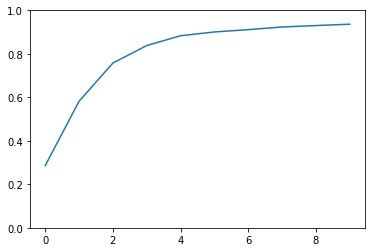

In [7]:
# IID case: all the clients have images of all the classes
# Centralized graph topology (fully-connected network)

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32

# Communication matrix

comm_matrix = create_mixing_matrix('centralized', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs = run(train_loader, test_loader, comm_matrix, num_rounds, epochs, num_clients)

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs)
plt.show()

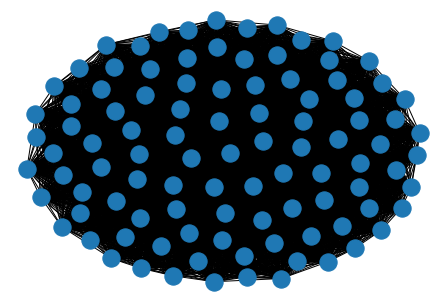

In [8]:
graph = nx.from_numpy_matrix(comm_matrix)
nx.draw(graph)

## Ring topology

0-th round
lr 0.1 | average train loss 2.26 | test loss 2.25 | test acc: 0.213
1-th round
lr 0.1 | average train loss 1.72 | test loss 1.43 | test acc: 0.766
2-th round
lr 0.1 | average train loss 1.09 | test loss 0.746 | test acc: 0.819
3-th round
lr 0.1 | average train loss 0.725 | test loss 0.517 | test acc: 0.859
4-th round
lr 0.1 | average train loss 0.59 | test loss 0.405 | test acc: 0.891
5-th round
lr 0.1 | average train loss 0.498 | test loss 0.339 | test acc: 0.905
6-th round
lr 0.1 | average train loss 0.431 | test loss 0.293 | test acc: 0.916
7-th round
lr 0.1 | average train loss 0.375 | test loss 0.266 | test acc: 0.922
8-th round
lr 0.1 | average train loss 0.297 | test loss 0.238 | test acc: 0.929
9-th round
lr 0.1 | average train loss 0.281 | test loss 0.22 | test acc: 0.934
[0.095564, 0.08047, 0.07751, 0.078146, 0.080756, 0.083271, 0.081986, 0.082346, 0.081873, 0.08024, 0.081328, 0.082238, 0.081898, 0.078912, 0.073732, 0.070982, 0.072066, 0.076432, 0.081518, 0.08278, 

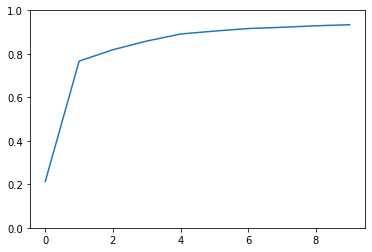

In [9]:
# IID case: all the clients have images of all the classes
# Ring graph topology: each client is connected to two neighbours exactly

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32

# Communication matrix

comm_matrix = create_mixing_matrix('ring', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs1 = run(train_loader, test_loader, comm_matrix, num_rounds, epochs, num_clients)

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs1)
plt.show()

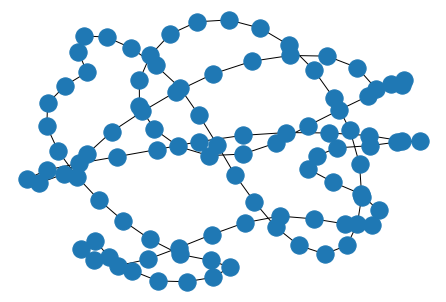

In [10]:
graph = nx.from_numpy_matrix(comm_matrix)
nx.draw(graph)

## Grid topology

0-th round
lr 0.1 | average train loss 2.26 | test loss 2.25 | test acc: 0.338
1-th round
lr 0.1 | average train loss 1.78 | test loss 1.55 | test acc: 0.690
2-th round
lr 0.1 | average train loss 1.11 | test loss 0.763 | test acc: 0.810
3-th round
lr 0.1 | average train loss 0.758 | test loss 0.512 | test acc: 0.863
4-th round
lr 0.1 | average train loss 0.582 | test loss 0.398 | test acc: 0.892
5-th round
lr 0.1 | average train loss 0.471 | test loss 0.326 | test acc: 0.910
6-th round
lr 0.1 | average train loss 0.4 | test loss 0.285 | test acc: 0.919
7-th round
lr 0.1 | average train loss 0.39 | test loss 0.254 | test acc: 0.927
8-th round
lr 0.1 | average train loss 0.334 | test loss 0.23 | test acc: 0.933
9-th round
lr 0.1 | average train loss 0.296 | test loss 0.212 | test acc: 0.937
[0.023151, 0.020316, 0.019527, 0.020414, 0.020319, 0.02184, 0.0227, 0.021018, 0.020792, 0.018905, 0.020846, 0.018418, 0.018334, 0.020455, 0.019516, 0.020572, 0.019734, 0.019559, 0.020983, 0.018513, 0

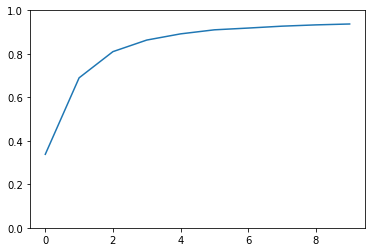

In [11]:
# IID case: all the clients have images of all the classes
# Grid graph topology: each client is connected to exactly 4 neighbours

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs2 = run(train_loader, test_loader, comm_matrix, num_rounds, epochs, num_clients)

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs2)
plt.show()

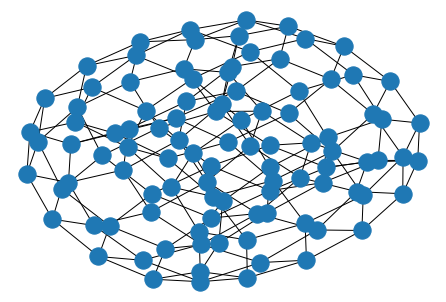

In [12]:
graph = nx.from_numpy_matrix(comm_matrix)
nx.draw(graph)

## Star topology

0-th round
lr 0.1 | average train loss 2.28 | test loss 2.27 | test acc: 0.276
1-th round
lr 0.1 | average train loss 2.1 | test loss 2.06 | test acc: 0.585
2-th round
lr 0.1 | average train loss 1.42 | test loss 1.03 | test acc: 0.778
3-th round
lr 0.1 | average train loss 0.934 | test loss 0.621 | test acc: 0.834
4-th round
lr 0.1 | average train loss 0.648 | test loss 0.451 | test acc: 0.877
5-th round
lr 0.1 | average train loss 0.538 | test loss 0.368 | test acc: 0.899
6-th round
lr 0.1 | average train loss 0.475 | test loss 0.314 | test acc: 0.912
7-th round
lr 0.1 | average train loss 0.399 | test loss 0.28 | test acc: 0.918
8-th round
lr 0.1 | average train loss 0.321 | test loss 0.251 | test acc: 0.926
9-th round
lr 0.1 | average train loss 0.301 | test loss 0.23 | test acc: 0.932
[1e-06, 0.017155, 0.017201, 0.015639, 0.016893, 0.016758, 0.016617, 0.017301, 0.016167, 0.017464, 0.014609, 0.01878, 0.016729, 0.014419, 0.017907, 0.017402, 0.020682, 0.017493, 0.013664, 0.017874, 0.

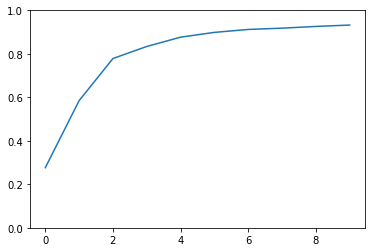

In [13]:
# IID case: all the clients have images of all the classes
# Star graph topology: each client is connected only to one central machine

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32

# Communication matrix

comm_matrix = create_mixing_matrix('star', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs3 = run(train_loader, test_loader, comm_matrix, num_rounds, epochs, num_clients)

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs3)
plt.show()

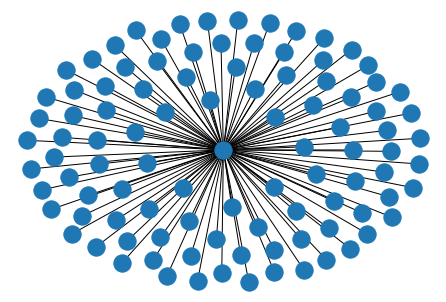

In [14]:
graph = nx.from_numpy_matrix(comm_matrix)
nx.draw(graph)

## Circular ladder topology

0-th round
lr 0.1 | average train loss 2.26 | test loss 2.26 | test acc: 0.464
1-th round
lr 0.1 | average train loss 1.78 | test loss 1.57 | test acc: 0.723
2-th round
lr 0.1 | average train loss 1.1 | test loss 0.775 | test acc: 0.801
3-th round
lr 0.1 | average train loss 0.763 | test loss 0.511 | test acc: 0.867
4-th round
lr 0.1 | average train loss 0.573 | test loss 0.393 | test acc: 0.898
5-th round
lr 0.1 | average train loss 0.512 | test loss 0.329 | test acc: 0.910
6-th round
lr 0.1 | average train loss 0.376 | test loss 0.282 | test acc: 0.921
7-th round
lr 0.1 | average train loss 0.377 | test loss 0.255 | test acc: 0.926
8-th round
lr 0.1 | average train loss 0.326 | test loss 0.228 | test acc: 0.934
9-th round
lr 0.1 | average train loss 0.262 | test loss 0.208 | test acc: 0.939
[0.05244, 0.04938, 0.048703, 0.045922, 0.047442, 0.049689, 0.048949, 0.048904, 0.050668, 0.049046, 0.048962, 0.047662, 0.050824, 0.046568, 0.043018, 0.041094, 0.044875, 0.049324, 0.051179, 0.04965

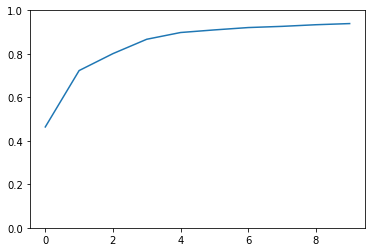

In [15]:
# IID case: all the clients have images of all the classes
# Circular ladder topology: each client is connected to exactly 3 neighbours

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32

# Communication matrix

comm_matrix = create_mixing_matrix('ladder', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs4 = run(train_loader, test_loader, comm_matrix, num_rounds, epochs, num_clients)

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs4)
plt.show()

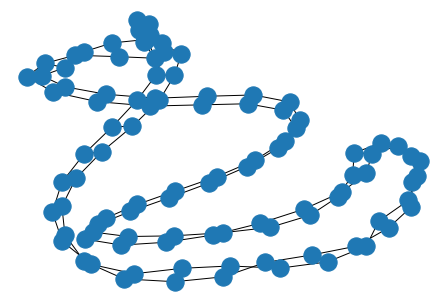

In [16]:
graph = nx.from_numpy_matrix(comm_matrix)
nx.draw(graph)

## Disconnected graph

0-th round
lr 0.1 | average train loss 2.29 | test loss 2.29 | test acc: 0.276
1-th round
lr 0.1 | average train loss 2.24 | test loss 2.24 | test acc: 0.429
2-th round
lr 0.1 | average train loss 1.81 | test loss 1.67 | test acc: 0.713
3-th round
lr 0.1 | average train loss 1.12 | test loss 0.834 | test acc: 0.808
4-th round
lr 0.1 | average train loss 0.791 | test loss 0.584 | test acc: 0.850
5-th round
lr 0.1 | average train loss 0.608 | test loss 0.463 | test acc: 0.876
6-th round
lr 0.1 | average train loss 0.485 | test loss 0.39 | test acc: 0.895
7-th round
lr 0.1 | average train loss 0.359 | test loss 0.343 | test acc: 0.906
8-th round
lr 0.1 | average train loss 0.314 | test loss 0.311 | test acc: 0.912
9-th round
lr 0.1 | average train loss 0.197 | test loss 0.29 | test acc: 0.916
[0.381028, 0.639411, 0.398183, 0.419525, 0.429052, 0.546445, 0.40172, 0.418679, 0.394743, 0.396699, 0.59928, 0.410585, 0.442971, 0.596245, 0.427828, 0.462024, 0.442234, 0.412808, 0.413047, 0.424196, 

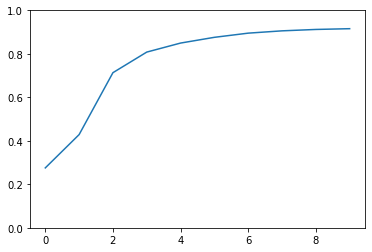

In [17]:
# IID case: all the clients have images of all the classes
# Disconnected graph: no communication between machines

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32

# Communication matrix

comm_matrix = create_mixing_matrix('disconnected', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs5 = run(train_loader, test_loader, comm_matrix, num_rounds, epochs, num_clients)

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs5)
plt.show()

## Plot

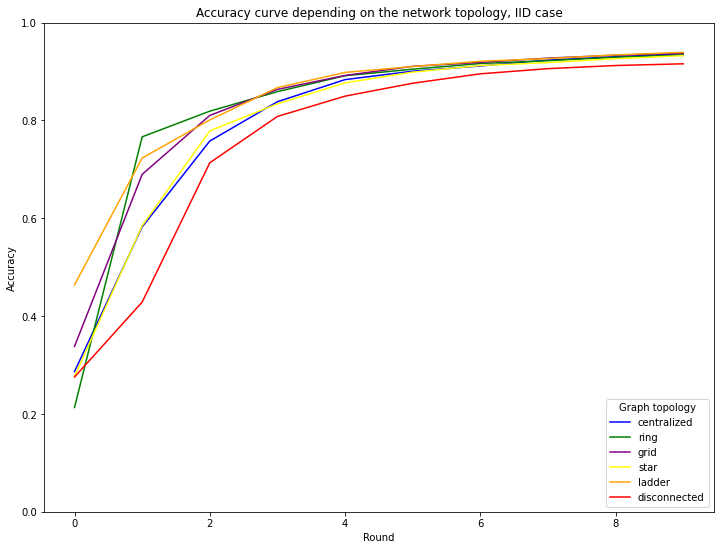

In [20]:
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.set_ylim([0, 1])
x = np.array(range(10))
ax.plot(x, accs, color="blue", label="centralized")
ax.plot(x, accs1, color="green", label="ring")
ax.plot(x, accs2, color="purple", label="grid")
ax.plot(x, accs3, color="yellow", label="star")
ax.plot(x, accs4, color="orange", label="ladder")
ax.plot(x, accs5, color="red", label="disconnected")

# Add a legend, and position it on the lower right (with no box)
plt.legend(loc="lower right", title="Graph topology")
plt.title("Accuracy curve depending on the network topology, IID case")
plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.show()

# NON-IID case: every client has images of two categories chosen from [0, 1], [2, 3], [4, 5], [6, 7], or [8, 9].


0-th round
lr 0.1 | average train loss 0.842 | test loss 2.33 | test acc: 0.161
1-th round
lr 0.1 | average train loss 0.591 | test loss 2.32 | test acc: 0.198
2-th round
lr 0.1 | average train loss 0.428 | test loss 2.21 | test acc: 0.234
3-th round
lr 0.1 | average train loss 0.205 | test loss 2.01 | test acc: 0.310
4-th round
lr 0.1 | average train loss 0.0995 | test loss 1.88 | test acc: 0.362
5-th round
lr 0.1 | average train loss 0.0957 | test loss 1.75 | test acc: 0.438
6-th round
lr 0.1 | average train loss 0.0683 | test loss 1.62 | test acc: 0.468
7-th round
lr 0.1 | average train loss 0.0642 | test loss 1.47 | test acc: 0.558
8-th round
lr 0.1 | average train loss 0.0778 | test loss 1.42 | test acc: 0.524
9-th round
lr 0.1 | average train loss 0.0475 | test loss 1.33 | test acc: 0.569
[0.004583, 0.004276, 0.003869, 0.003601, 0.003324, 0.003006, 0.002779, 0.002553, 0.002327, 0.002132, 0.001967, 0.001788, 0.001642, 0.001514, 0.001406, 0.001313, 0.001247, 0.001209, 0.001192, 0.0

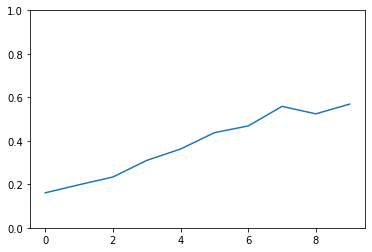

In [22]:
# NON-IID case: every client has images of two categories chosen from [0, 1], [2, 3], [4, 5], [6, 7], or [8, 9].
# Centralized graph topology (fully-connected network)

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32

# Communication matrix

comm_matrix = create_mixing_matrix('centralized', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients, 'non-iid')

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs = run(train_loader, test_loader, comm_matrix, num_rounds, epochs, num_clients)

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs)
plt.show()

0-th round
lr 0.1 | average train loss 0.704 | test loss 2.24 | test acc: 0.405
1-th round
lr 0.1 | average train loss 0.237 | test loss 2.12 | test acc: 0.458
2-th round
lr 0.1 | average train loss 0.0918 | test loss 2.05 | test acc: 0.459
3-th round
lr 0.1 | average train loss 0.0743 | test loss 2.02 | test acc: 0.460
4-th round
lr 0.1 | average train loss 0.0738 | test loss 2 | test acc: 0.458
5-th round
lr 0.1 | average train loss 0.0483 | test loss 1.98 | test acc: 0.461
6-th round
lr 0.1 | average train loss 0.0421 | test loss 1.97 | test acc: 0.455
7-th round
lr 0.1 | average train loss 0.0445 | test loss 1.96 | test acc: 0.448
8-th round
lr 0.1 | average train loss 0.0284 | test loss 1.94 | test acc: 0.451
9-th round
lr 0.1 | average train loss 0.0451 | test loss 1.94 | test acc: 0.452
[0.209893, 0.182141, 0.186098, 0.203967, 0.225758, 0.243294, 0.253737, 0.258663, 0.261303, 0.264278, 0.265061, 0.262577, 0.262053, 0.261699, 0.25787, 0.253329, 0.245577, 0.230807, 0.208162, 0.182

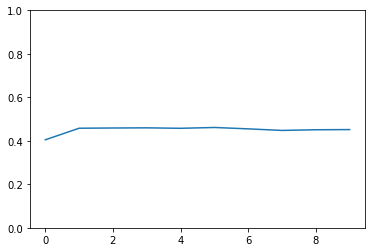

In [23]:
# NON-IID case: every client has images of two categories chosen from [0, 1], [2, 3], [4, 5], [6, 7], or [8, 9].
# Ring graph topology: each client is connected to two neighbours exactly

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32

# Communication matrix

comm_matrix = create_mixing_matrix('ring', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients, 'non-iid')

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs1 = run(train_loader, test_loader, comm_matrix, num_rounds, epochs, num_clients)

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs1)
plt.show()

0-th round
lr 0.1 | average train loss 0.768 | test loss 2.25 | test acc: 0.222
1-th round
lr 0.1 | average train loss 0.214 | test loss 2.1 | test acc: 0.255
2-th round
lr 0.1 | average train loss 0.152 | test loss 1.97 | test acc: 0.370
3-th round
lr 0.1 | average train loss 0.0632 | test loss 1.86 | test acc: 0.358
4-th round
lr 0.1 | average train loss 0.108 | test loss 1.8 | test acc: 0.382
5-th round
lr 0.1 | average train loss 0.078 | test loss 1.7 | test acc: 0.459
6-th round
lr 0.1 | average train loss 0.0682 | test loss 1.64 | test acc: 0.474
7-th round
lr 0.1 | average train loss 0.0653 | test loss 1.56 | test acc: 0.503
8-th round
lr 0.1 | average train loss 0.0574 | test loss 1.5 | test acc: 0.539
9-th round
lr 0.1 | average train loss 0.0707 | test loss 1.45 | test acc: 0.555
[0.087607, 0.081258, 0.078097, 0.077331, 0.075878, 0.073736, 0.081519, 0.073539, 0.070281, 0.072955, 0.084801, 0.081348, 0.075251, 0.072536, 0.065916, 0.072854, 0.07831, 0.064818, 0.062375, 0.06206, 

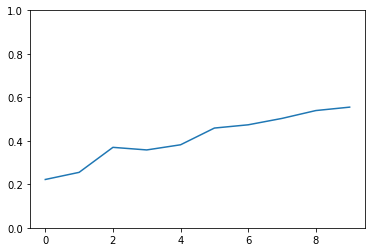

In [24]:
# NON-IID case: every client has images of two categories chosen from [0, 1], [2, 3], [4, 5], [6, 7], or [8, 9].
# Grid graph topology: each client is connected to exactly 4 neighbours

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients, 'non-iid')

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs2 = run(train_loader, test_loader, comm_matrix, num_rounds, epochs, num_clients)

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs2)
plt.show()

0-th round
lr 0.1 | average train loss 0.845 | test loss 2.29 | test acc: 0.175
1-th round
lr 0.1 | average train loss 0.605 | test loss 2.24 | test acc: 0.278
2-th round
lr 0.1 | average train loss 0.398 | test loss 2.12 | test acc: 0.529
3-th round
lr 0.1 | average train loss 0.169 | test loss 1.93 | test acc: 0.585
4-th round
lr 0.1 | average train loss 0.142 | test loss 1.79 | test acc: 0.625
5-th round
lr 0.1 | average train loss 0.0898 | test loss 1.59 | test acc: 0.657
6-th round
lr 0.1 | average train loss 0.101 | test loss 1.44 | test acc: 0.661
7-th round
lr 0.1 | average train loss 0.0766 | test loss 1.31 | test acc: 0.674
8-th round
lr 0.1 | average train loss 0.0941 | test loss 1.24 | test acc: 0.675
9-th round
lr 0.1 | average train loss 0.075 | test loss 1.14 | test acc: 0.681
[2e-06, 0.011245, 0.008286, 0.007377, 0.007345, 0.007569, 0.008658, 0.007978, 0.006894, 0.007635, 0.009136, 0.007883, 0.007383, 0.008378, 0.00815, 0.007645, 0.007654, 0.009528, 0.007486, 0.00701, 0

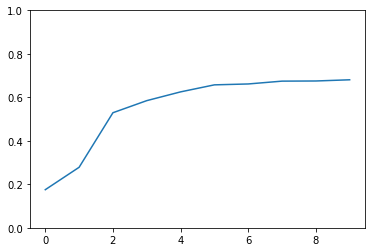

In [29]:
# NON-IID case: every client has images of two categories chosen from [0, 1], [2, 3], [4, 5], [6, 7], or [8, 9].
# Star graph topology: each client is connected only to one central machine

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32

# Communication matrix

comm_matrix = create_mixing_matrix('star', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients, 'non-iid')

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs3 = run(train_loader, test_loader, comm_matrix, num_rounds, epochs, num_clients)

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs3)
plt.show()

0-th round
lr 0.1 | average train loss 0.757 | test loss 2.26 | test acc: 0.225
1-th round
lr 0.1 | average train loss 0.309 | test loss 2.13 | test acc: 0.330
2-th round
lr 0.1 | average train loss 0.129 | test loss 1.99 | test acc: 0.328
3-th round
lr 0.1 | average train loss 0.124 | test loss 1.87 | test acc: 0.467
4-th round
lr 0.1 | average train loss 0.161 | test loss 1.8 | test acc: 0.476
5-th round
lr 0.1 | average train loss 0.0708 | test loss 1.72 | test acc: 0.585
6-th round
lr 0.1 | average train loss 0.104 | test loss 1.68 | test acc: 0.595
7-th round
lr 0.1 | average train loss 0.0719 | test loss 1.61 | test acc: 0.619
8-th round
lr 0.1 | average train loss 0.0978 | test loss 1.59 | test acc: 0.620
9-th round
lr 0.1 | average train loss 0.0531 | test loss 1.53 | test acc: 0.640
[0.197679, 0.204417, 0.225132, 0.24234, 0.253925, 0.262417, 0.262238, 0.259413, 0.251105, 0.237217, 0.20468, 0.163386, 0.161743, 0.210107, 0.222474, 0.215609, 0.219367, 0.222045, 0.218526, 0.208101

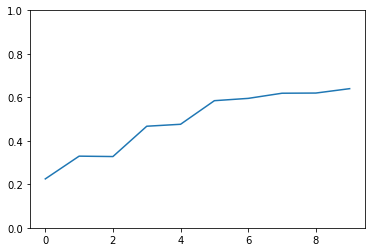

In [30]:
# NON-IID case: every client has images of two categories chosen from [0, 1], [2, 3], [4, 5], [6, 7], or [8, 9].
# Circular ladder topology: each client is connected to exactly 3 neighbours

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32

# Communication matrix

comm_matrix = create_mixing_matrix('ladder', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients, 'non-iid')

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs4 = run(train_loader, test_loader, comm_matrix, num_rounds, epochs, num_clients)

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs4)
plt.show()

0-th round
lr 0.1 | average train loss 0.695 | test loss 2.26 | test acc: 0.103
1-th round
lr 0.1 | average train loss 0.328 | test loss 2.18 | test acc: 0.211
2-th round
lr 0.1 | average train loss 0.12 | test loss 2.11 | test acc: 0.247
3-th round
lr 0.1 | average train loss 0.0888 | test loss 2.09 | test acc: 0.293
4-th round
lr 0.1 | average train loss 0.0727 | test loss 2.07 | test acc: 0.309
5-th round
lr 0.1 | average train loss 0.0501 | test loss 2.06 | test acc: 0.314
6-th round
lr 0.1 | average train loss 0.0443 | test loss 2.05 | test acc: 0.330
7-th round
lr 0.1 | average train loss 0.033 | test loss 2.04 | test acc: 0.334
8-th round
lr 0.1 | average train loss 0.0267 | test loss 2.03 | test acc: 0.340
9-th round
lr 0.1 | average train loss 0.0142 | test loss 2.02 | test acc: 0.346
[0.267208, 0.289005, 0.296203, 0.256905, 0.309827, 0.271131, 0.287417, 0.281206, 0.289726, 0.275694, 0.299715, 0.282021, 0.273859, 0.307918, 0.282277, 0.278044, 0.269481, 0.27857, 0.277646, 0.257

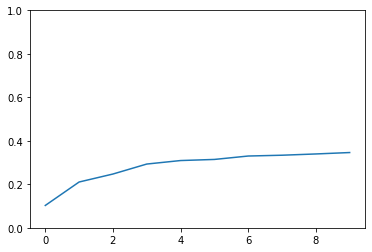

In [31]:
# NON-IID case: every client has images of two categories chosen from [0, 1], [2, 3], [4, 5], [6, 7], or [8, 9].
# Disconnected graph: no communication between machines

# Hyperparameters

num_clients = 100
num_rounds = 10
epochs = 1
batch_size = 32

# Communication matrix

comm_matrix = create_mixing_matrix('disconnected', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients, 'non-iid')

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs5 = run(train_loader, test_loader, comm_matrix, num_rounds, epochs, num_clients)

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs5)
plt.show()

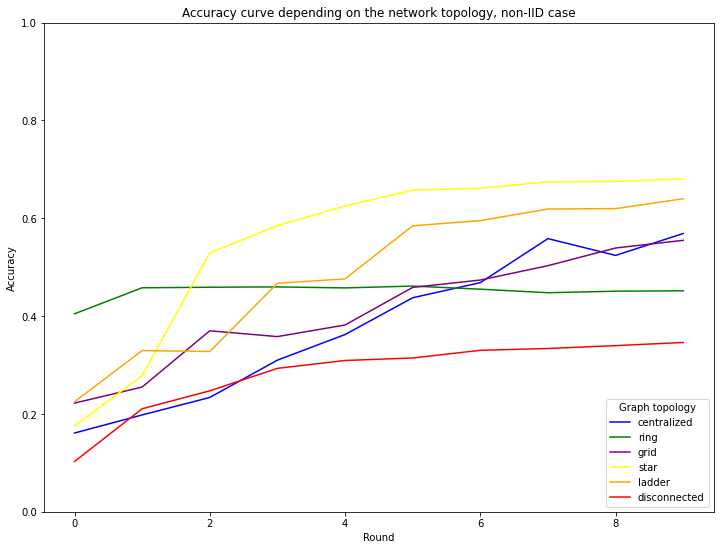

In [33]:
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.set_ylim([0, 1])
x = np.array(range(10))
ax.plot(x, accs, color="blue", label="centralized")
ax.plot(x, accs1, color="green", label="ring")
ax.plot(x, accs2, color="purple", label="grid")
ax.plot(x, accs3, color="yellow", label="star")
ax.plot(x, accs4, color="orange", label="ladder")
ax.plot(x, accs5, color="red", label="disconnected")

# Add a legend, and position it on the lower right (with no box)
plt.legend(loc="lower right", title="Graph topology")
plt.title("Accuracy curve depending on the network topology, non-IID case")
plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.show()

# Topology evolving over time

0-th round
lr 0.1 | average train loss 2.28 | test loss 2.27 | test acc: 0.395
1-th round
lr 0.1 | average train loss 2.1 | test loss 2.06 | test acc: 0.650
2-th round
lr 0.1 | average train loss 1.31 | test loss 0.931 | test acc: 0.777
3-th round
lr 0.1 | average train loss 0.877 | test loss 0.598 | test acc: 0.838
4-th round
lr 0.1 | average train loss 0.661 | test loss 0.455 | test acc: 0.874
5-th round
lr 0.1 | average train loss 0.551 | test loss 0.365 | test acc: 0.900
6-th round
lr 0.1 | average train loss 0.461 | test loss 0.311 | test acc: 0.913
7-th round
lr 0.1 | average train loss 0.412 | test loss 0.276 | test acc: 0.922
8-th round
lr 0.1 | average train loss 0.369 | test loss 0.25 | test acc: 0.926
9-th round
lr 0.1 | average train loss 0.319 | test loss 0.226 | test acc: 0.933
10-th round
lr 0.1 | average train loss 0.292 | test loss 0.207 | test acc: 0.937
11-th round
lr 0.1 | average train loss 0.264 | test loss 0.193 | test acc: 0.942
12-th round
lr 0.1 | average trai

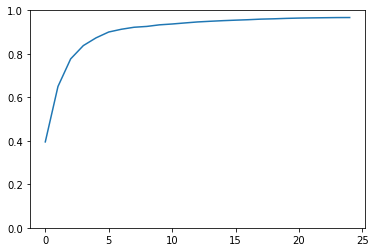

In [8]:
# IID case: all the clients have images of all the classes
# Grid graph topology: each client is connected to exactly 4 neighbours
# Base case with a fixed topology for comparison

# Hyperparameters

num_clients = 100
num_rounds = 25
epochs = 1
batch_size = 32

# Communication matrix

comm_matrix = create_mixing_matrix('grid', num_clients)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs0 = run(train_loader, test_loader, comm_matrix, num_rounds, epochs, num_clients)

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs0)
plt.show()

0-th round, star topology
lr 0.1 | average train loss 2.28 | test loss 2.28 | test acc: 0.234
1-th round, grid topology
lr 0.1 | average train loss 2.19 | test loss 2.17 | test acc: 0.503
2-th round, ladder topology
lr 0.1 | average train loss 1.54 | test loss 1.16 | test acc: 0.758
3-th round, centralized topology
lr 0.1 | average train loss 0.916 | test loss 0.634 | test acc: 0.833
4-th round, ring topology
lr 0.1 | average train loss 0.73 | test loss 0.47 | test acc: 0.873
5-th round, star topology
lr 0.1 | average train loss 0.619 | test loss 0.379 | test acc: 0.896
6-th round, grid topology
lr 0.1 | average train loss 0.471 | test loss 0.321 | test acc: 0.908
7-th round, ladder topology
lr 0.1 | average train loss 0.406 | test loss 0.275 | test acc: 0.922
8-th round, centralized topology
lr 0.1 | average train loss 0.396 | test loss 0.247 | test acc: 0.930
9-th round, ring topology
lr 0.1 | average train loss 0.343 | test loss 0.224 | test acc: 0.935
10-th round, star topology
lr 

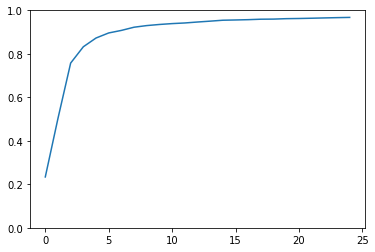

In [2]:
# IID case: all the clients have images of all the classes
# We assign a random order to the topologies and change the topology at each round according to this order

# Hyperparameters

num_clients = 100
num_rounds = 25
epochs = 1
batch_size = 32
topos = ['centralized', 'ring', 'star', 'grid', 'ladder']
np.random.shuffle(topos)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs = run_topos(train_loader, test_loader, num_rounds,
                                              epochs, num_clients, topos, shuffle='modulo')

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs)
plt.show()

0-th round, ring topology
lr 0.1 | average train loss 2.29 | test loss 2.28 | test acc: 0.204
1-th round, ring topology
lr 0.1 | average train loss 2.2 | test loss 2.18 | test acc: 0.616
2-th round, ring topology
lr 0.1 | average train loss 1.51 | test loss 1.12 | test acc: 0.797
3-th round, ring topology
lr 0.1 | average train loss 0.941 | test loss 0.678 | test acc: 0.816
4-th round, ring topology
lr 0.1 | average train loss 0.706 | test loss 0.483 | test acc: 0.871
5-th round, star topology
lr 0.1 | average train loss 0.527 | test loss 0.382 | test acc: 0.895
6-th round, star topology
lr 0.1 | average train loss 0.463 | test loss 0.322 | test acc: 0.911
7-th round, star topology
lr 0.1 | average train loss 0.404 | test loss 0.283 | test acc: 0.921
8-th round, star topology
lr 0.1 | average train loss 0.352 | test loss 0.251 | test acc: 0.926
9-th round, star topology
lr 0.1 | average train loss 0.331 | test loss 0.23 | test acc: 0.932
10-th round, ladder topology
lr 0.1 | average tr

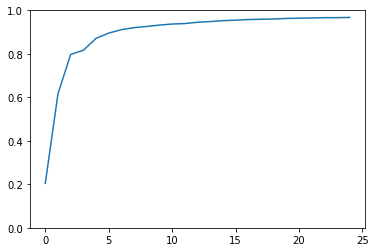

In [3]:
# IID case: all the clients have images of all the classes
# We keep the same topology for a number of rounds before changing it

# Hyperparameters

num_clients = 100
num_rounds = 25
epochs = 1
batch_size = 32
topos = ['centralized', 'ring', 'star', 'grid', 'ladder']
np.random.shuffle(topos)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs1 = run_topos(train_loader, test_loader, num_rounds,
                                               epochs, num_clients, topos, shuffle='fraction')

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs1)
plt.show()

0-th round, star topology
lr 0.1 | average train loss 2.28 | test loss 2.28 | test acc: 0.393
1-th round, grid topology
lr 0.1 | average train loss 2.12 | test loss 2.09 | test acc: 0.658
2-th round, star topology
lr 0.1 | average train loss 1.29 | test loss 0.957 | test acc: 0.789
3-th round, ladder topology
lr 0.1 | average train loss 0.863 | test loss 0.601 | test acc: 0.836
4-th round, ladder topology
lr 0.1 | average train loss 0.662 | test loss 0.44 | test acc: 0.878
5-th round, centralized topology
lr 0.1 | average train loss 0.55 | test loss 0.355 | test acc: 0.902
6-th round, ring topology
lr 0.1 | average train loss 0.512 | test loss 0.304 | test acc: 0.916
7-th round, grid topology
lr 0.1 | average train loss 0.371 | test loss 0.263 | test acc: 0.925
8-th round, grid topology
lr 0.1 | average train loss 0.337 | test loss 0.239 | test acc: 0.929
9-th round, ladder topology
lr 0.1 | average train loss 0.32 | test loss 0.219 | test acc: 0.935
10-th round, grid topology
lr 0.1 |

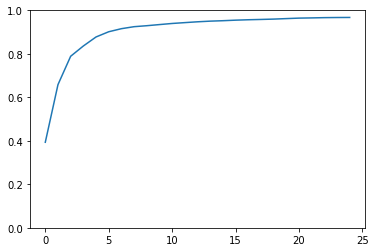

In [4]:
# IID case: all the clients have images of all the classes
# We pick a topology at random at each round

# Hyperparameters

num_clients = 100
num_rounds = 25
epochs = 1
batch_size = 32
topos = ['centralized', 'ring', 'star', 'grid', 'ladder']
np.random.shuffle(topos)

# Creating decentralized datasets

train_loader, test_loader = load_data(batch_size, num_clients)

# Instantiate models and optimizers and run decentralized training

global_model, client_models, accs2 = run_topos(train_loader, test_loader, num_rounds,
                                               epochs, num_clients, topos, shuffle='random')

cons = consensus(global_model, client_models)
print(cons)

axes = plt.gca()
axes.set_ylim([0,1])
plt.plot(range(num_rounds), accs2)
plt.show()

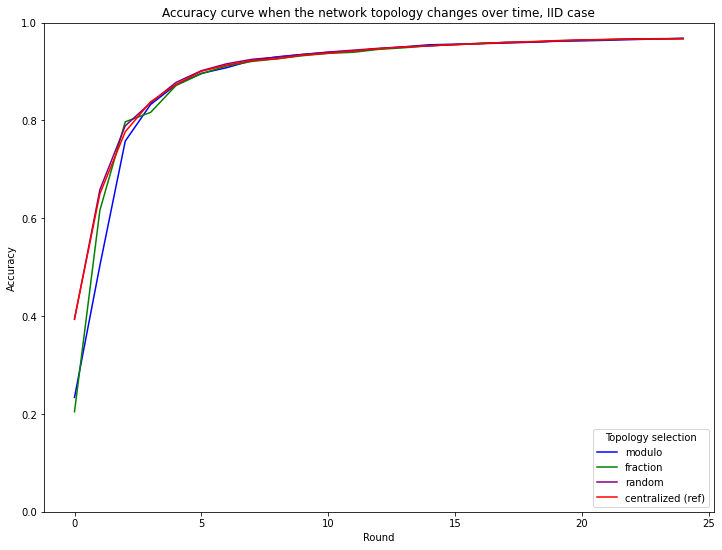

In [9]:
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.set_ylim([0, 1])
x = np.array(range(25))
ax.plot(x, accs, color="blue", label="modulo")
ax.plot(x, accs1, color="green", label="fraction")
ax.plot(x, accs2, color="purple", label="random")
ax.plot(x, accs0, color="red", label="centralized (ref)")

# Add a legend, and position it on the lower right (with no box)
plt.legend(loc="lower right", title="Topology selection")
plt.title("Accuracy curve when the network topology changes over time, IID case")
plt.xlabel("Round")
plt.ylabel("Accuracy")
plt.show()